In [ ]:
%matplotlib notebook

In [3]:
import serial, threading, sys, time
sys.path.append('/home/pi/Desktop/ADRNX')
from SRS import SIM900, SIM921, SIM922, SIM970
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [4]:
mf = SIM900.SIM900('/home/pi/Desktop/ADRNX/SRS/config.yaml',debug=False)
mf.init_mainframe()
s921 = SIM921.SIM921(mf,'s921',debug=True);
s922 = SIM922.SIM922(mf,'s922',debug=False);
s970 = SIM970.SIM970(mf,'s970',debug=True);
mf.register_and_init_mods([s921, s922, s970])
mf.start_comm_threads()

In [ ]:
from IPython.display import clear_output
temps, times = ([] for i in range(2))
s = timer()

s922.debug = False
s922.start_data_stream(0)
i = 0
try:
    while timer() - s < (30):
        gotevent = s922.await_next_event(tm=1.5,clear_before=True,clear_after=False)
        if gotevent:
            temp = s922.lastvalues.values()
            tm = s922.lastdatatimes.values()
            temps.append(list(temp))
            times.append(list(tm))
            i+=1
            print(i)
                   
        try:
            print(s922.excq.get_nowait())
            print("OOPS!")
        except:
            #print "No exceptions!"
            pass                
        #print("|{:5d}|{:s}|{:8f}".format(i,temp,tm[0]))
        
except Exception as e:
    print(e)
finally:
    s922.stop_data_stream()
    s922.flush_queue()

In [5]:
from IPython.display import clear_output
temps, times = ([] for i in range(2))
s = timer()

s970.debug = True
s970.start_data_stream(0)
i = 0
try:
    while timer() - s < (30*1):
        gotevent = s970.await_next_event(tm=1.5,clear_before=True,clear_after=True)
        print(gotevent)
        if gotevent:
            temp = s970.lastvalues.values()
            tm = s970.lastdatatimes.values()
            temps.append(list(temp))
            times.append(list(tm))
            i+=1
            print(i)
                   
        try:
            print(s970.excq.get_nowait())
            print("OOPS!")
        except:
            #print "No exceptions!"
            pass                
        #print("|{:5d}|{:s}|{:8f}".format(i,temp,tm[0]))
        
except Exception as e:
    print(e)
finally:
    s970.stop_data_stream()
    s970.flush_queue()

SIM970 stream thread up


/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: | 0.0000011,-0.00|(16)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))
/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: |00095, 0.0001391, 0.0000653|(27)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))


True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26


/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: |-0.0000017,-0.00|(16)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))
/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: |00071, 0.0001366, 0.0000723|(27)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))


True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41


/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: | 0.0000017,-0.000006|(20)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))
/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: |0, 0.0001487, 0.0000634|(23)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))


True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72


/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: | 0.0000007,-0.00|(16)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))
/home/pi/Desktop/ADRNX/SRS/SIM970.py:77: UserWarning: SIM970M BAD LENGTH: |00072, 0.0001438, 0.0000722|(27)
  if (debugl): warnings.warn("SIM970M BAD LENGTH: |{}|({})".format(val,len(val))))


True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105


In [6]:
data1 = [[x[i] for x in temps] for i in range(0,4)]
tm1 = [[x[i] for x in times] for i in range(0,4)]

In [ ]:
len(' 0.0000024,-0.0000024, 0.0001405, 0.0000679')

In [ ]:
tm1

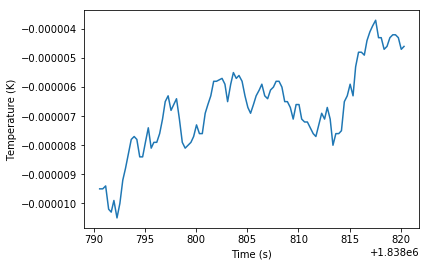

In [7]:
fig = plt.figure()
plt.plot(tm1[1],data1[1],'-')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.show()

In [ ]:
with open("warmup_20170710.txt", "w") as f:
    for i in range(0,len(times)):
        f.write("{} {} {}\n".format(times[i],temps[i],dcs[i]))

In [ ]:
mfc.stop_input_loop()
mfc.stop_output_loop()

In [ ]:
len('5.232800E+01, 5.653000E+00, 5.723000E+00, 1.376550E+02')

In [ ]:
range(0,4)

In [ ]:
s922.stop_data_stream()